# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [6]:
# Groupby
employee.groupby('Department')['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [10]:
# pivot table
employee.pivot_table(index= 'Department', values= 'Salary') # by default is the mean


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [11]:
# Method 1
employee.pivot_table(index= ['Department', 'Title'], values= 'Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [12]:
# Method 2
employee.pivot_table(index= 'Department', columns='Title', values= 'Salary')

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [15]:
employee.pivot_table(index= ['Department', 'Title'], values= ['Salary','Years'])

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [25]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Name'], aggfunc={'Salary': 'mean', 'Name': 'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [31]:
dt = employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=[np.median, np.max, np.min, np.std])

#### Based on your comments, fill the missing values with an appropriate value.

In [32]:
dt.fillna(0)

median   amax   amin       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     35     30  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [33]:
employee.pivot_table(index=['Department'], values=['Salary', 'Name'], aggfunc={'Salary': 'sum', 'Name': 'count'})


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [34]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'], aggfunc={'Salary': 'mean', 'Years': 'sum'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [42]:
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc = lambda l: (l.drop(l.idxmax())).mean())

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [43]:
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [52]:
fitbit.describe()
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [53]:
fitbit.columns
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [75]:
correlation_coefficient = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
correlation_coefficient

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

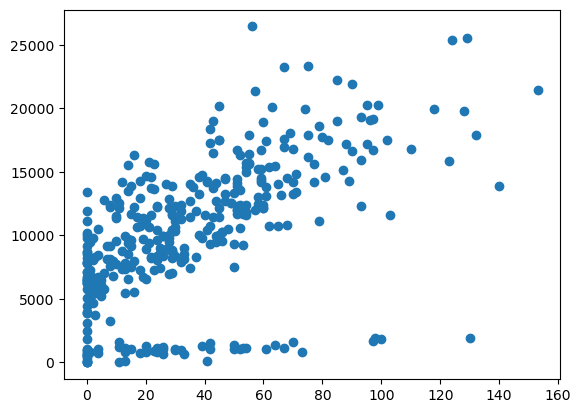

In [86]:
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# We can see that the correlation is positive. Maybe if we drop the oulayers we would have a correlation close to one.
# In genereal when we are more active we do more steps


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [81]:
correlation_coefficient = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation_coefficient

0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [83]:
correlation_coefficient = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
correlation_coefficient

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

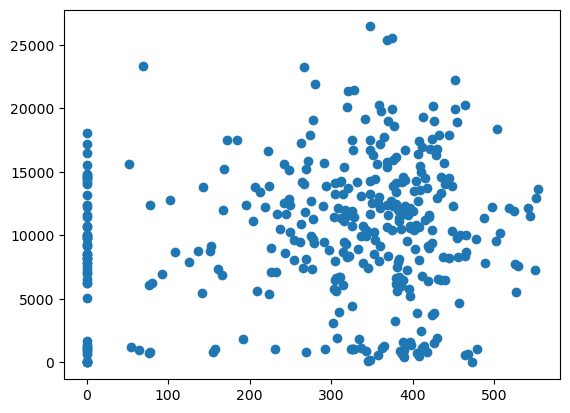

In [85]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [90]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [91]:
cor_fit.sort_values('Steps', ascending= False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [93]:
time_grades = pd.read_csv('Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

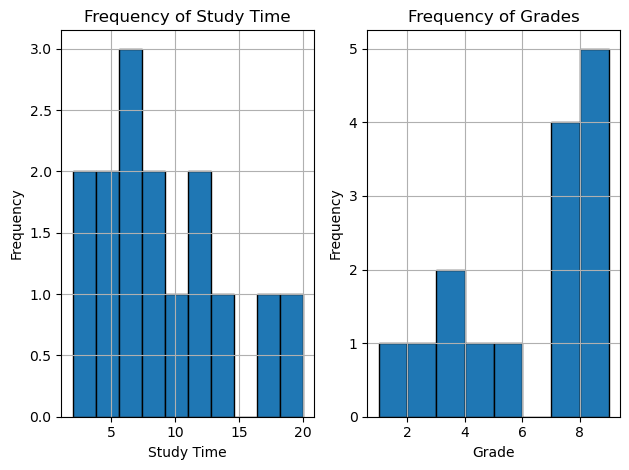

In [99]:
fig, axes = plt.subplots(1, 2)

# Plotting histogram for Study time
axes[0].hist(time_grades['Study time'], bins=10, edgecolor='black')
axes[0].set_xlabel('Study Time')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Study Time')
axes[0].grid(True)

# Plotting histogram for Grade
axes[1].hist(time_grades['Grade'], bins=8, edgecolor='black')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Grades')
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [106]:
# Calculating Pearson correlation
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')
print(f'Pearson correlation: {pearson_corr}')

# Calculating Spearman correlation
spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
print(f'Spearman correlation: {spearman_corr}')

Pearson correlation: 0.7980456073578858
Spearman correlation: 0.819658753036942


- If the Pearson correlation coefficient is close to 1, it indicates a strong positive linear relationship between study time and grade. A value close to -1 would indicate a strong negative linear relationship, and a value close to 0 would indicate no linear relationship.

- The Spearman correlation coefficient ranges between -1 and 1, with 1 indicating a perfect monotonic relationship, -1 indicating a perfect inverse monotonic relationship, and 0 indicating no monotonic relationship.

Since the dataset is relatively small, and both "Study time" and "Grade" are continuous numerical variables, we can interpret both correlation coefficients as follows:

- If the Pearson correlation coefficient is positive and close to 1, it suggests that there is a strong positive linear relationship between study time and grade, meaning that students who study more tend to get higher grades.

- The Spearman correlation coefficient should give a similar result as the data is not heavily skewed, and the relationship between study time and grade is likely monotonic.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

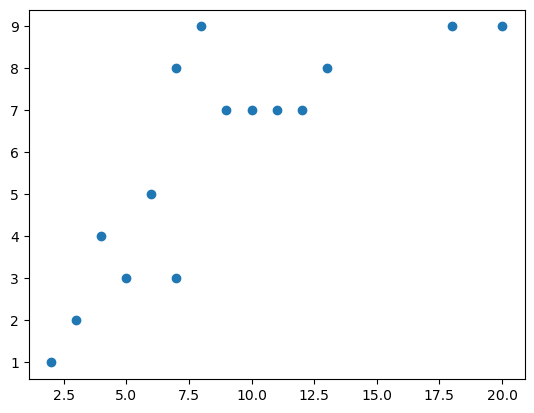

In [112]:
plt.scatter(x = time_grades['Study time'],y = time_grades['Grade'])

# Podem veure que en aquest cas la relacio no es liniar, es monotonic creixent (positiva), segona derivada negativa.
# Since second derivate is negative, therefore the most productive hours are at the bigining. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

- If the Pearson correlation coefficient is positive and close to 1, it suggests that there is a strong positive linear relationship between study time and grade, meaning that students who study more tend to get higher grades.

- The Spearman correlation coefficient should give a similar result as the data is not heavily skewed, and the relationship between study time and grade is likely monotonic.